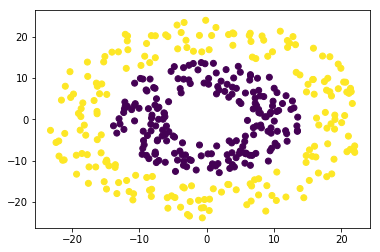

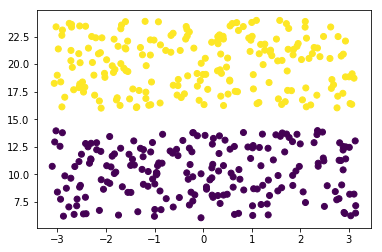

In [277]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import math
from math import atan2

csvFile = open("dataset_circles.csv", "r")
reader = csv.reader(csvFile)

result = []
for item in reader:
    for i in range(3):
        item[i] = float(item[i])
    result.append(item)
result = np.array(result)

plt.scatter(result[:,0], result[:,1], c = result[:,2])

plt.figure()
ang = []
for i in range(len(result[:,1])):
    ang_ind = atan2(result[i,1], result[i,0])
    ang.append(ang_ind)

dist_tran = np.sqrt(result[:,0]**2 + result[:,1]**2)

ang = np.array(ang)
dist_tran = np.array(dist_tran)
plt.scatter(ang, dist_tran, c = result[:,2])

csvFile.close()

In [273]:
class kmeans():
    
    def __init__(self, orig_data):
        self.orig_data = orig_data

    def vote(self, center1, center2):
        self.label = []
        for i in range(len(self.orig_data)):
            dist_indv1 = np.linalg.norm(self.orig_data[i] - center1)
            dist_indv2 = np.linalg.norm(self.orig_data[i] - center2)
            if dist_indv1 > dist_indv2:
                self.label.append(1)
            else:
                self.label.append(0)
        self.label = np.array(self.label)
    
    def performance(self, center1, center2):
        self.vote(center1, center2)
        self.group1_index = np.argwhere(self.label == 0)    #np.argwhere(ndarray!!!)
        performance1 = np.sum((self.orig_data[self.group1_index[:,0]] - center1)**2)    #np.argwhere返回n*1的矩阵，转换成n维向量才能带入下标
        self.group2_index = np.argwhere(self.label == 1)
        performance2 = np.sum((self.orig_data[self.group2_index[:,0]] - center2)**2)
        return performance1 + performance2
    
    def move_center(self):
        center1_new = np.sum(self.orig_data[self.group1_index[:,0]], axis = 0) / len(self.orig_data[self.group1_index[:,0]])
        center2_new = np.sum(self.orig_data[self.group2_index[:,0]], axis = 0) / len(self.orig_data[self.group2_index[:,0]])
        return center1_new, center2_new
        
    def score(self, label_true):
        score = 0
        for i in range(len(label_true)):
            if label_true[i] == self.label[i]:
                score += 1
        score /= len(label_true)
        return score

[0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1
 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1
 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0
 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1
 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1

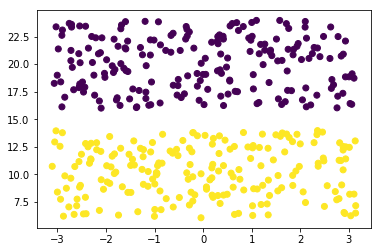

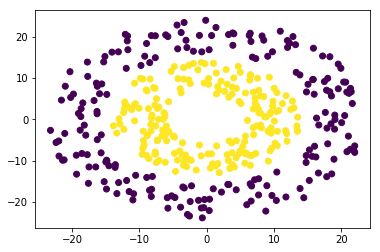

In [278]:
data = np.hstack((ang.reshape(-1,1), dist_tran.reshape(-1,1)))
true_label = result[:,2]
#选择重心起点
center1 = data[1]
center2 = data[34]
km = kmeans(data)

performance_save = [0]
for i in range(10):
    p = km.performance(center1, center2)
    performance_save.append(p)
    if performance_save[i+1] == performance_save[i]:
        break
    else: 
        center1, center2 = km.move_center()
        print(km.label)
#print(performance_save)
#print(km.score(true_label))
#print(center1, center2)
#print(km.label)
plt.scatter(data[:, 0], data[:, 1], c = km.label)
plt.figure()
plt.scatter(result[:,0], result[:,1], c = km.label)